NETFLIX DATASET PRACTICE

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

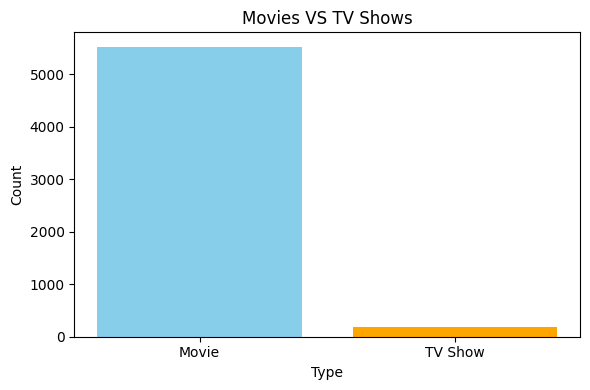

In [2]:
df = pd.read_csv('netflix_titles.csv')
df = df.dropna(subset=['type', 'title', 'director', 'cast', 'date_added', 'release_year', 'rating', 'duration', 'listed_in', 'description'])

type_counts = df['type'].value_counts()
plt.figure(figsize=(6,4))
plt.bar(type_counts.index, type_counts.values, color=['skyblue', 'orange'])
plt.title("Movies VS TV Shows")
plt.xlabel('Type')
plt.ylabel('Count')
plt.tight_layout()
#plt.savefig('movies_vs_tvShow.png')

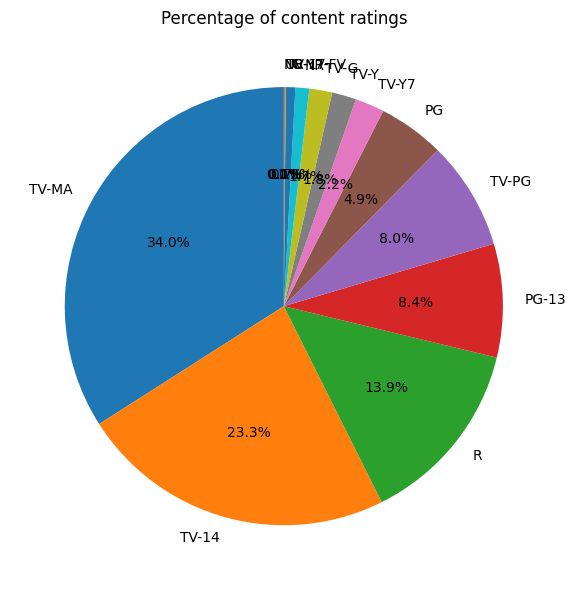

In [3]:
rating_counts = df['rating'].value_counts()
plt.figure(figsize=(8,6))
plt.pie(rating_counts, labels=rating_counts.index,autopct='%1.1f%%' ,startangle=90)
plt.title("Percentage of content ratings")
plt.tight_layout()
#plt.savefig('contentRating.png')

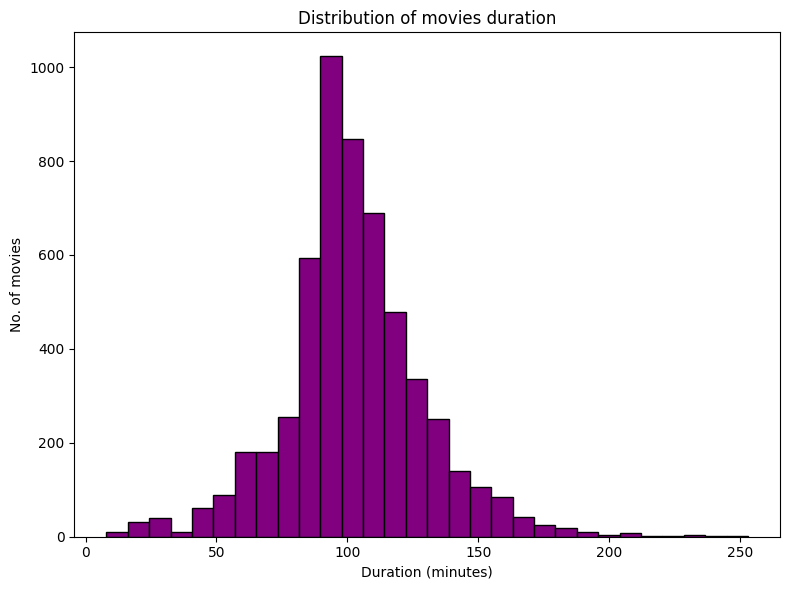

In [4]:
movie_df = df[df['type'] == "Movie"].copy()
movie_df['duration_int'] = movie_df['duration'].str.replace('min', '').astype(int)

plt.figure(figsize=(8,6))
plt.hist(movie_df['duration_int'], bins=30, color='purple', edgecolor = 'black')
plt.title('Distribution of movies duration')
plt.xlabel('Duration (minutes)')
plt.ylabel('No. of movies')
plt.tight_layout()
#plt.savefig('movie_duration_hist.png')

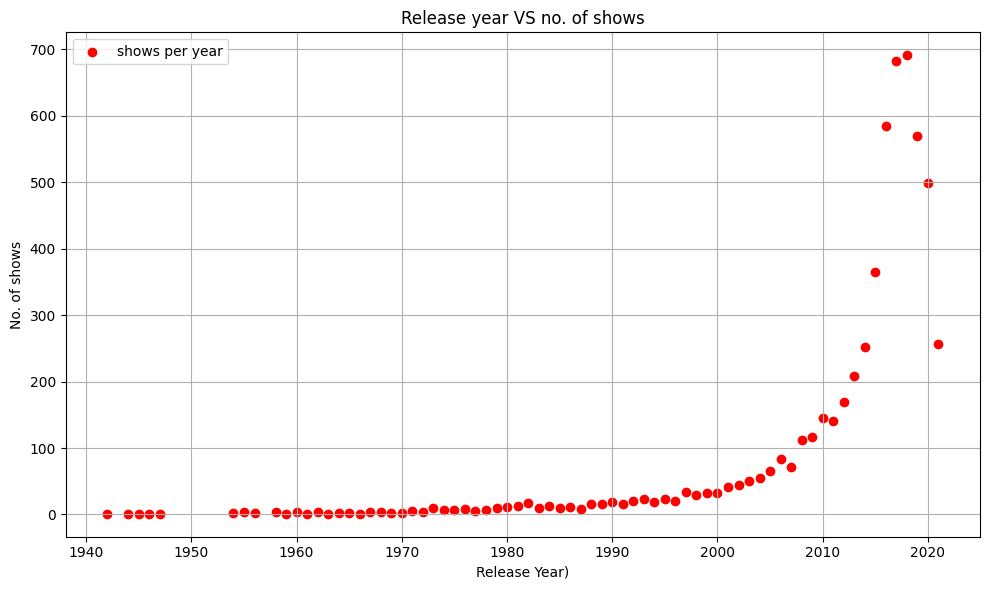

In [5]:
release_counts = df['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
plt.scatter(release_counts.index, release_counts.values, color='red', label = 'shows per year')

plt.title('Release year VS no. of shows')
plt.xlabel('Release Year)')
plt.ylabel('No. of shows')
plt.grid(True)
plt.tight_layout()
plt.legend()
#plt.savefig('Release_year_scatter.png')

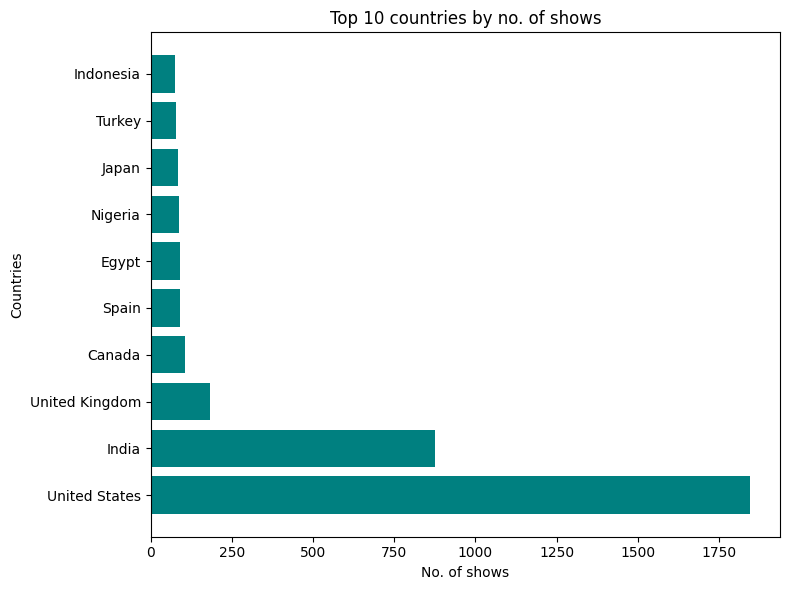

In [6]:
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(8,6))

plt.barh(country_counts.index, country_counts.values, color = 'teal')
plt.title('Top 10 countries by no. of shows')
plt.ylabel('Countries')
plt.xlabel('No. of shows')
plt.tight_layout()
# plt.savefig('shows_by_country.png')

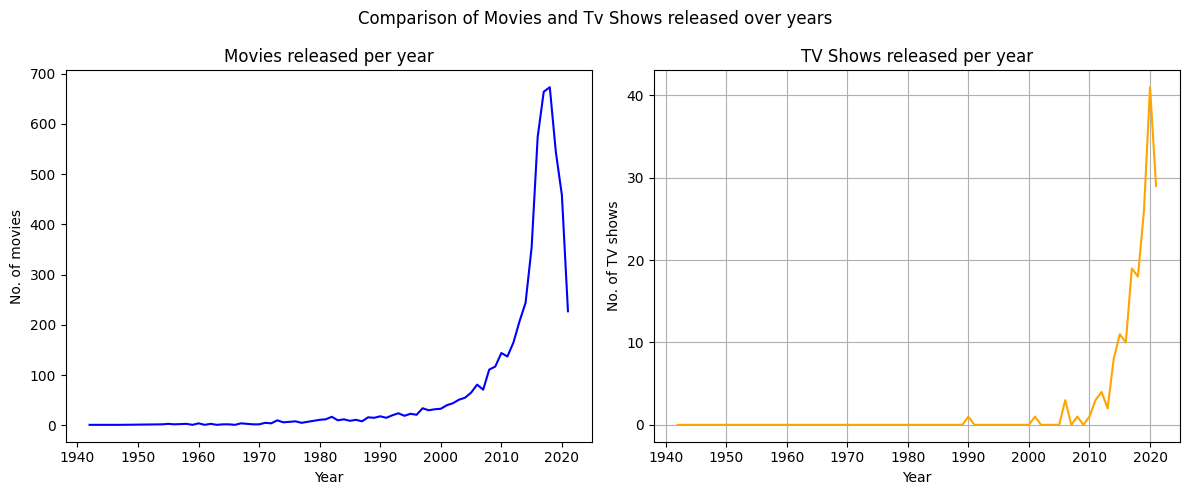

In [ ]:
content_by_year = df.groupby(['release_year', 'type' ]).size().unstack().fillna(0)

fig, ax = plt.subplots(1,2, figsize = (12,5))

# first subplot: movies
ax[0].plot(content_by_year.index, content_by_year['Movie'], color = 'blue')
ax[0].set_title('Movies released per year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('No. of movies')

# second subplot: TV_shows
ax[1].plot(content_by_year.index, content_by_year['TV Show'], color = 'orange')
ax[1].set_title('TV Shows released per year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('No. of TV shows')

fig.suptitle('Comparison of Movies and Tv Shows released over years')

plt.tight_layout()

# plt.savefig("movies_VS_tvshows.png")